Probability is just:

How confident we are about something happening.

ML uses probability everywhere:

"Will this user click?" → probability

"Is this an image of a cat?" → probability

"What is the next word?" → probability

Coin Flip

A coin has 2 possible outcomes: Heads or Tails.

If we don’t know anything:
P(Heads) = 0.5

In [18]:
import random

coin = ["Heads", "Tails"]
random.choice(coin)

'Tails'

Probability = How likely something is to happen.

Formula (don’t panic, it’s easy):

𝑃
(
event
)
=
Number of ways event can happen
Total possible outcomes
P(event)=
Total possible outcomes
Number of ways event can happen
	​


In [19]:
import random 

coin=["Heads", "Tails"]
heads=0
tails=0


for  i in range (100):
    flip=random.choice(coin)
    if flip=="Heads":
        heads+=1
    else:
        tails+=1



print("Heads:", heads)
print("Tails:", tails)  
print('proba of Heads:', heads/100)      

Heads: 48
Tails: 52
proba of Heads: 0.48


why we need to learn this  for mL?

P(dog|image)=0.92




P(A)=
Total possible outcomes/
Number of favorable outcomes
	​


1. Complement Rule

The probability of not A:

p(A)=1-p(A)

union rule=P(A∪B)=P(A)+P(B)−P(A∩B)
This removes double-counting.

In [50]:
A=[2,4,6]
B=[5,4,6]

SAMPLE_SPACE=len(A)+len(B)






def proba(EVENT, SAMPLE_SPACE):
      return len(EVENT)/SAMPLE_SPACE



print(proba(A, SAMPLE_SPACE))






0.5


In [ ]:

def intersection(A,B):
 UNION=[]

 for i in A:
    if i in B:
         UNION.append(i)
 return UNION
 
A=[2,4,6]
B=[5,4,6]
print(intersection(A,B))


[4, 6]


In [54]:


def union(A,B,SAMPLE_SPACE):
    UNION = (proba(A, SAMPLE_SPACE) + proba(B, SAMPLE_SPACE)) - proba(intersection(A,B), SAMPLE_SPACE)
    return UNION

print(union(A,B,SAMPLE_SPACE))

0.6666666666666667


What Are Independent Events?

Two events A and B are independent if:

P(A∩B)=P(A)⋅P(B)

This means event A does NOT affect event B.

In [74]:
import random

def flip():
    return random.choice(["H", "T"])

def independent(N):
    H=0
    T=0
    for  i in range(N):
        result=flip()
        if result=="H":
            H+=1
        else:
            T+=1

    print("Joint probability:", (H/N)*(T/N))

independent(1000)


Joint probability: 0.249991


------------
Example: Eating your sandwich vs How much sandwich is left

Event A = You take 1 bite
Event B = There is less sandwich left

 Does taking a bite affect how much remains?
YES.

 Conclusion:

Taking bites and remaining sandwich depend on each other → dependent events.

In [75]:
import random

N = 10000
count = 0

for _ in range(N):
    deck = ["A"]*4 + ["Other"]*48
    random.shuffle(deck)

    A = deck.pop(0) == "A"
    B = deck.pop(1) == "A" if len(deck) > 1 else False

    if A and B:
        count += 1

print(count / N)

0.0041


P(A ∩ B) = P(A) · P(B)
-------------------------
P(A ∩ B) = P(A) · P(B | A)
------------------------


P(B | A) = probability of B given A happened

Event A = “Your phone will turn off soon”
Event B = “Battery is at 5%”

If you know the battery is 5%,
the chance of your phone turning off is much higher.

This is:

P(Turn off | Battery is 5%)

Conditional probability formula:

P(A|B)=P(A∩B)/P(B)


Meaning:

From all cases where B happens

How many of those also contain A

It’s like zooming in.

--------------------------------
SUPER SHORT SUMMARY

Normal probability = probability in the whole world

Given probability = probability inside a smaller world where B is true

It means:

“What is the chance of A knowing B already happened?”

Event A = “Phone dies soon”

Event B = “Battery < 5%”

----------------------
BAYES THEOREM — SUPER SIMPLE EXPLANATION

Idea:

Bayes tells you how to flip conditional probability:
You know P(A | B), and you want P(B | A).


---------------------------------------------------------
Formula (simple)


P(B|A)=P(A|B).P(B)/P(A)
	​


P(B | A) → probability of B happening knowing A happened

P(A | B) → probability of A happening knowing B happened

P(B) → probability of B

P(A) → probability of A

--------------------------------
PDF = Probability Density Function

Used for continuous values (like height, price, weight).
 PDF tells you how dense the probability is around a value.
 Important:
The PDF value is not the probability.
The area under the curve is the probability.

Example: Height of people in a city → Normal distribution.

# Probability Density Function (PDF)

The probability that a continuous random variable \(X\) lies between \(a\) and \(b\):

$$
P(a < X < b) \;=\; \int_{a}^{b} f_X(x)\, dx
$$

Normalization condition (total probability = 1):

$$
\int_{-\infty}^{\infty} f_X(x)\, dx \;=\; 1
$$

Non-negativity:

$$
f_X(x) \ge 0 \quad\text{for all } x
$$

**Normal (Gaussian) distribution — PDF:**

$$
f(x) \;=\; \frac{1}{\sigma\sqrt{2\pi}}\,
\exp\!\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

Where \(\mu\) is the mean and \(\sigma\) the standard deviation.


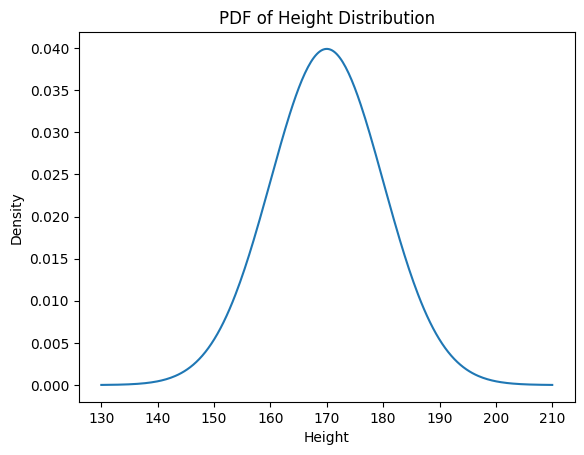

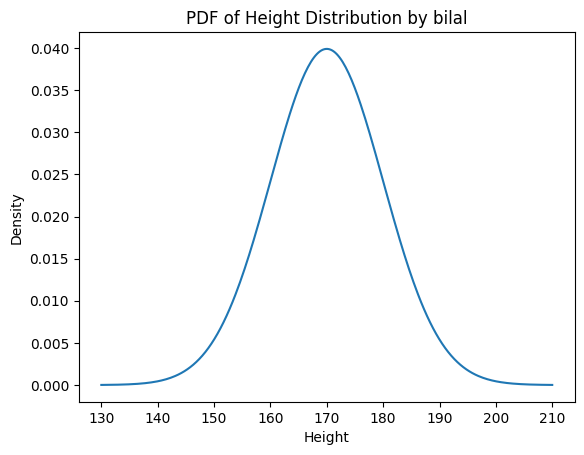

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mean = 170
std = 10

x = np.linspace(130, 210, 300)
pdf = norm.pdf(x, mean, std)
plt.plot(x, pdf)
plt.title("PDF of Height Distribution")
plt.xlabel("Height")
plt.ylabel("Density")
plt.show()














def PDF_bylal(X, mean, std):
   pdf=1/(std * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((X - mean) / std) ** 2) 
   return pdf
pdf = PDF_bylal(x, mean, std)

plt.plot(x, pdf)
plt.title("PDF of Height Distribution by bilal")
plt.xlabel("Height")
plt.ylabel("Density")
plt.show()

# Cumulative Distribution Function (CDF)

## Definition

The CDF gives the probability that a random variable \(X\) is less than or equal to a value \(x\):

$$
F(x) = P(X \le x)
$$

## Relationship With the PDF

The CDF is the integral of the PDF:

$$
F(x) = \int_{-\infty}^{x} f(t)\, dt
$$

## Normal Distribution CDF

For a normal distribution with mean \(\mu\) and standard deviation \(\sigma\):

$$
F(x) = \frac{1}{2} \left[ 1 + \mathrm{erf}\!\left( \frac{x - \mu}{\sigma \sqrt{2}} \right) \right]
$$


What CDF Actually Means (Intuition)

Imagine you have a continuous variable X — for example:

a person’s height

network latency

model errors

daily temperature

noise added to a model

The CDF tells you:

 “What is the probability that X is less than or equal to a number x?”

Example:

If 
𝐹
(
10
)
=
0.3
F(10)=0.3, then 30% of values are ≤ 10

If 
𝐹
(
0
)
=
0.5
F(0)=0.5, then half of values are ≤ 0

If 
𝐹
(
100
)
=
1.0
F(100)=1.0, then 100% of values are ≤ 100

# Cumulative Distribution Function (CDF)

## What CDF Means
The CDF gives the probability that a random variable \(X\) is less than or equal to a value \(x\):

$$
F(x) = P(X \le x)
$$

If \(F(10) = 0.3\), then 30% of all values are ≤ 10.

---

## Relationship With the PDF

The PDF tells us the *density* (shape), not the probability.

The CDF is the integral (accumulated area) of the PDF:

$$
F(x) = \int_{-\infty}^{x} f(t)\, dt
$$

The area under the PDF curve from \(-\infty\) to \(x\) equals the probability that \(X \le x\).

---

## Why We Need CDF in Machine Learning

- Calculating probabilities
- Naive Bayes classifiers
- Confidence intervals and p-values
- Percentiles and quantiles
- Anomaly detection (tail probabilities)
- Random number generation (inverse CDF)
- Distribution comparison tests

---

## Properties of the CDF

- Always between 0 and 1
- Always increasing
- \(F(-\infty) = 0\)
- \(F(+\infty) = 1\)

---

## CDF of Normal Distribution

For a normal distribution with mean \(\mu\) and std \(\sigma\):

$$
F(x) = \frac{1}{2}\left[1 + \mathrm{erf}\!\left(\frac{x - \mu}{\sigma\sqrt{2}}\right)\right]
$$


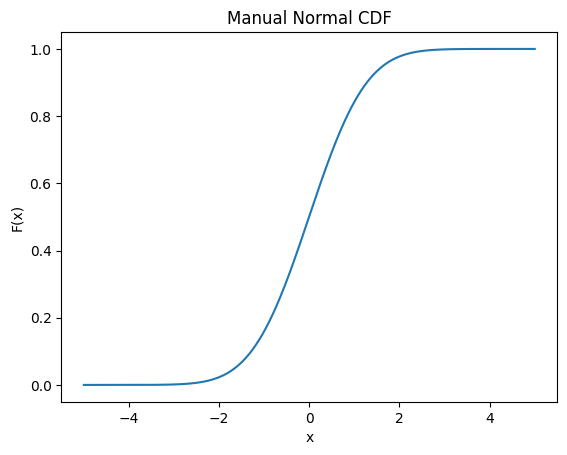

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



def CDF_bylal(x_values, mean=0, std=1):
    dx = x_values[1] - x_values[0]
    pdf_values = PDF_bylal(x_values, mean, std)
    cdf_values = np.cumsum(pdf_values) * dx  
    return cdf_values

x = np.linspace(-5, 5, 1000)
cdf_values = CDF_bylal(x)

plt.plot(x, cdf_values)
plt.title("Manual Normal CDF")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()


1. DISCRETE RANDOM VARIABLES

Values you count
No decimals
 Finite or countably infinite

Examples:

Number of calls today

Number of dropped packets

Number of customers

Number of SMS sent

Number of errors in a log

Number of retries

✔ Discrete uses these functions:
Function	Meaning
PMF	Probability of EACH exact value (P(X = x))
CDF	Probability X ≤ x
PPF	Inverse of CDF
✔ Common Discrete Distributions:

Bernoulli (0 or 1)

Binomial (k successes in n trials)

Poisson (events per time interval)

Geometric

Categorical

PDF is used only for continuous random variables (like height, latency, weight, time).

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [7]:
df=pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')


In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
df.shape

(150, 5)

univariate

In [17]:
data_SETOSA=df.loc[df['species']=='setosa']
data_SETOSA.shape
data_VERSICOLOR=df.loc[df['species']=='versicolor']
data_VERSICOLOR.shape
data_VIRGINICA=df.loc[df['species']=='virginica']



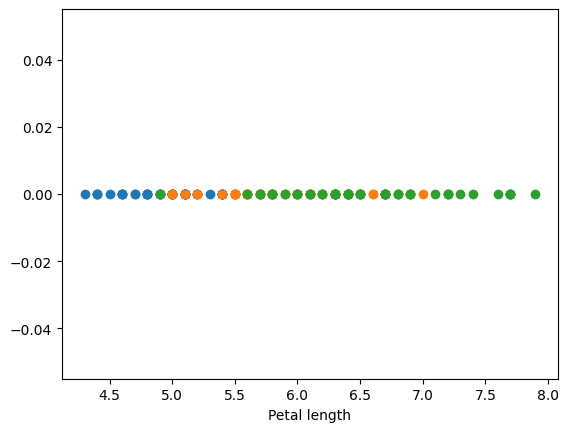

In [30]:
plt.plot(data_SETOSA['sepal_length'],np.zeros_like(data_SETOSA['sepal_length']),'o')
plt.plot(data_VERSICOLOR['sepal_length'],np.zeros_like(data_VERSICOLOR['sepal_length']),'o')
plt.plot(data_VIRGINICA['sepal_length'],np.zeros_like(data_VIRGINICA['sepal_length']),'o')
plt.xlabel('Petal length')
plt.show()

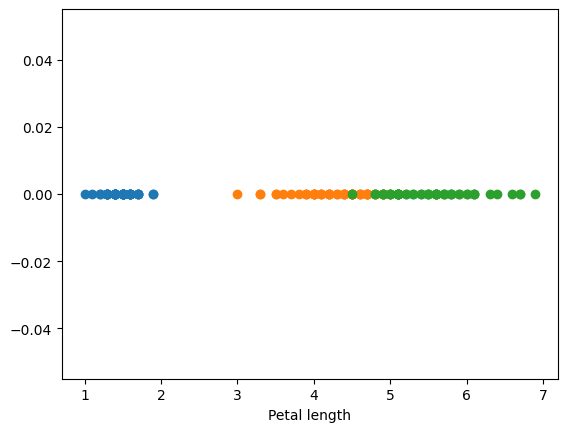

In [32]:
plt.plot(data_SETOSA['petal_length'],np.zeros_like(data_SETOSA['petal_length']),'o')
plt.plot(data_VERSICOLOR['petal_length'],np.zeros_like(data_VERSICOLOR['petal_length']),'o')
plt.plot(data_VIRGINICA['petal_length'],np.zeros_like(data_VIRGINICA['petal_length']),'o')
plt.xlabel('Petal length')
plt.show()

bivariate analysis

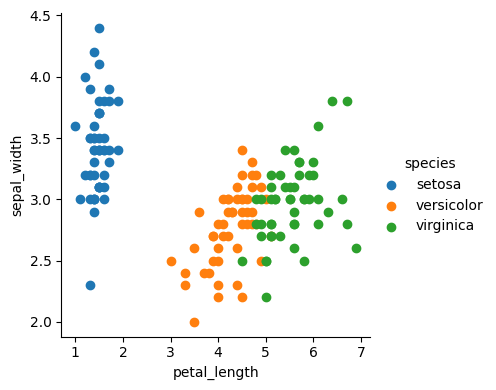

In [39]:
sns.FacetGrid(df, hue="species", height=4).map(plt.scatter, "petal_length", "sepal_width").add_legend()

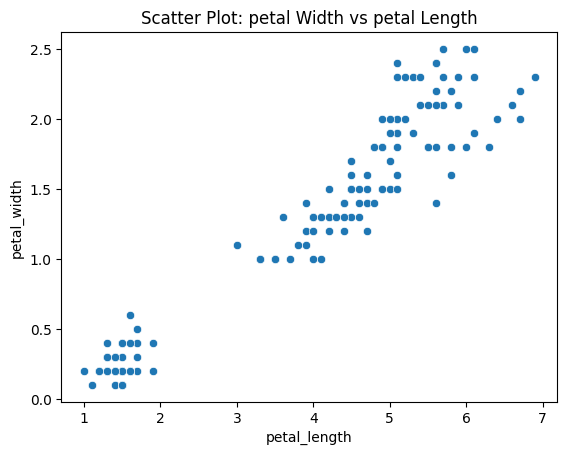

In [60]:
sns.scatterplot(data=df, x='petal_length', y='petal_width')
plt.title("Scatter Plot: petal Width vs petal Length")
plt.show()

In [66]:

x = df['petal_length'].values
y = df['petal_width'].values

n = len(x)
mean_x = x.mean()
mean_y = y.mean()

cov = np.sum((x-mean_x)*(y-mean_y)) / n       
var_x = np.sum((x-mean_x)**2) / n
var_y = np.sum((y-mean_y)**2) / n

r = cov / (np.sqrt(var_x) * np.sqrt(var_y))

print("mean_x =", mean_x)
print("mean_y =", mean_y)
print("Covariance =", cov)
print("Correlation =", r)



mean_x = 3.758666666666666
mean_y = 1.1986666666666668
Covariance = 1.287744888888889
Correlation = 0.9627570970509663


In [72]:
b = cov / np.var(x, ddof=1)
a = mean_y - b*mean_x

print("Slope b =", b)
print("Intercept a =", a)

y_pred = a + b*x

Slope b = -0.05688644557185038
Intercept a = 3.386406463624846


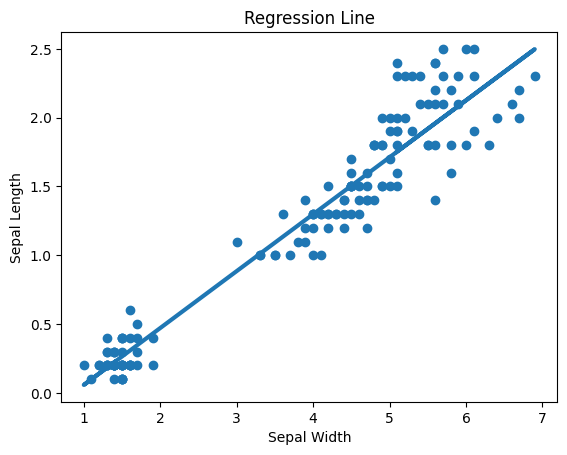

In [68]:
plt.scatter(x, y)
plt.plot(x, y_pred, linewidth=3)
plt.title("Regression Line")
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.show()

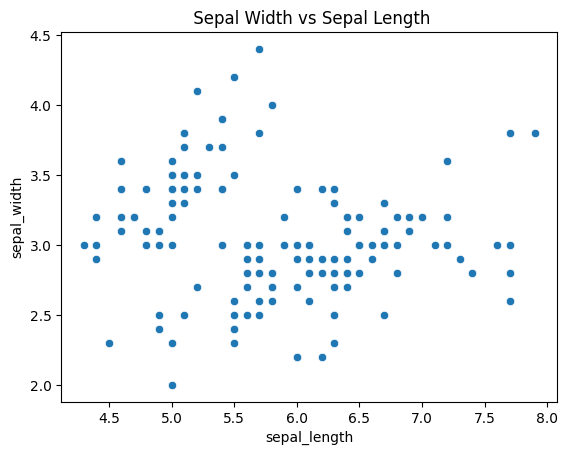

In [62]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width')
plt.title(" Sepal Width vs Sepal Length")
plt.show()

In [69]:

x = df['sepal_length'].values
y = df['sepal_width'].values

n = len(x)
mean_x = x.mean()
mean_y = y.mean()

cov = np.sum((x-mean_x)*(y-mean_y)) / n       
var_x = np.sum((x-mean_x)**2) / n
var_y = np.sum((y-mean_y)**2) / n

r = cov / (np.sqrt(var_x) * np.sqrt(var_y))

print("mean_x =", mean_x)
print("mean_y =", mean_y)
print("Covariance =", cov)
print("Correlation =", r)



mean_x = 5.843333333333334
mean_y = 3.0540000000000003
Covariance = -0.039006666666666676
Correlation = -0.10936924995064938


In [ ]:
b = cov / np.var(x, ddof=1)
a = mean_y - b*mean_x

print("Slope b =", b)
print("Intercept a =", a)

y_pred = a + b*x

Slope b = -0.05688644557185038
Intercept a = 3.386406463624846


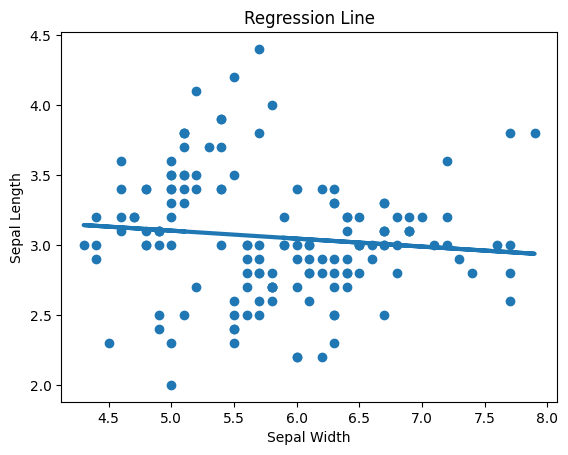

In [71]:
plt.scatter(x, y)
plt.plot(x, y_pred, linewidth=3)
plt.title("Regression Line")
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.show()

multivariate

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


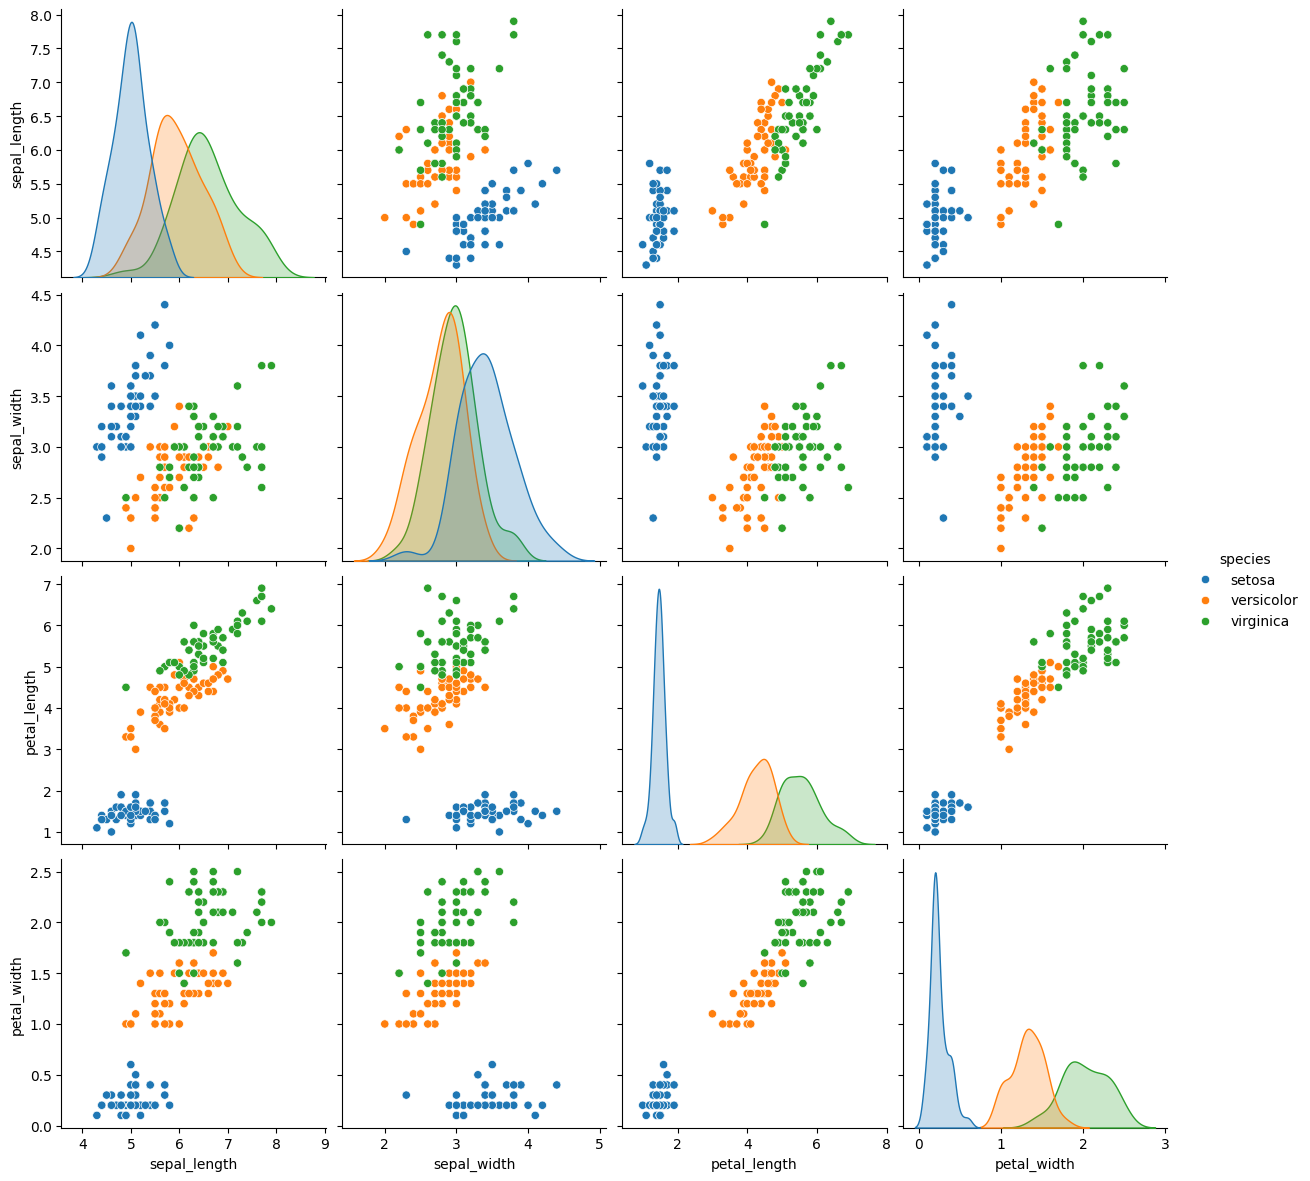

In [74]:
sns.pairplot(df, hue='species',size=3)

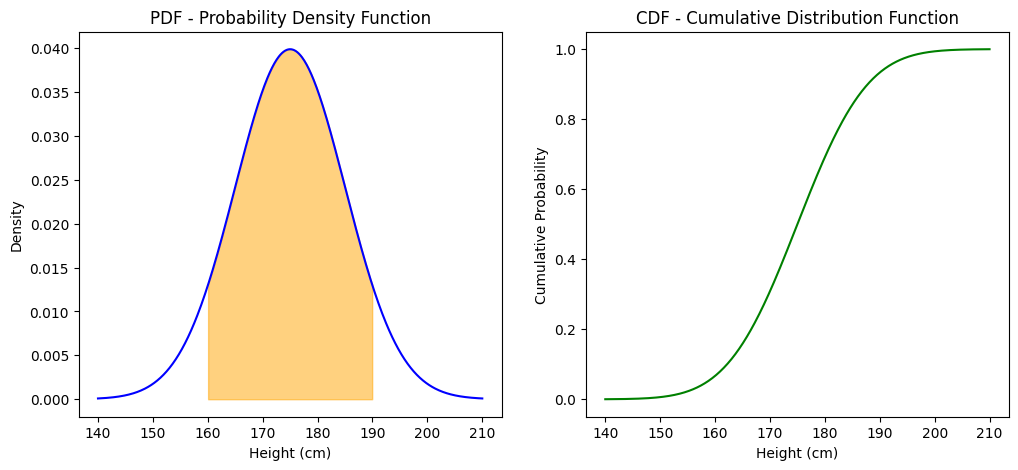

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


mu = 175      
sigma = 10    


x = np.linspace(140, 210, 500)  
pdf = norm.pdf(x, loc=mu, scale=sigma)
cdf = norm.cdf(x, loc=mu, scale=sigma)

plt.figure(figsize=(12,5))

# PDF
plt.subplot(1,2,1)
plt.plot(x, pdf, color='blue')
plt.fill_between(x, pdf, 0, where=(x>=160)&(x<=190), color='orange', alpha=0.5)
plt.title("PDF - Probability Density Function")
plt.xlabel("Height (cm)")
plt.ylabel("Density")

# CDF
plt.subplot(1,2,2)
plt.plot(x, cdf, color='green')
plt.title("CDF - Cumulative Distribution Function")
plt.xlabel("Height (cm)")
plt.ylabel("Cumulative Probability")

plt.show()
